# EPOCH Week2 D팀 TASK (4기 박정민) (데싸노트의 실전에서 통하는 머신러닝)

## CH5.로지스틱 회귀 : 타이타닉 생존자 예측 (p.137 ~ p.164)

### 5.2 라이브러리 및 데이터 불러오기


In [ ]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


### 5.3 데이터 확인하기

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [ ]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [ ]:
data.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


<Axes: >

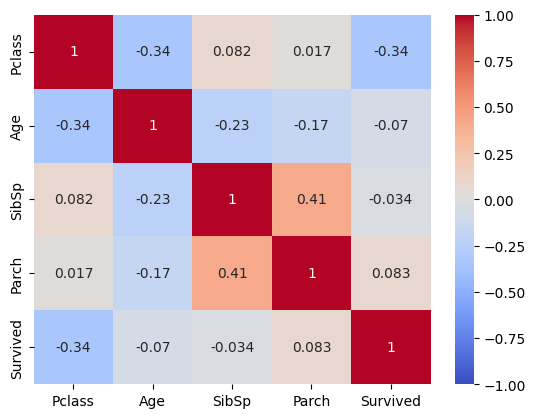

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

### 5.4 전처리 : 범주형 변수 변환하기 (더미변수와 원-핫 인코딩)

In [ ]:
num_Name = data['Name'].nunique()
num_Sex = data['Sex'].nunique()
num_Ticket = data['Ticket'].nunique()
num_Embarked = data['Embarked'].nunique()
print(f'Name : {num_Name}, Sex : {num_Sex}, Ticket : {num_Ticket}, Embarked : {num_Embarked}')

Name : 889, Sex : 2, Ticket : 680, Embarked : 3


In [ ]:
data = data.drop(['Name', 'Ticket'], axis=1)

In [ ]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [ ]:
pd.get_dummies(data, columns = ['Sex', 'Embarked'], dtype=int, drop_first=True)

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,1,0,1
885,1,19.0,0,0,1,0,0,1
886,3,28.0,1,2,0,0,0,1
887,1,26.0,0,0,1,1,0,0


In [ ]:
data = pd.get_dummies(data, columns = ['Sex', 'Embarked'], dtype=int, drop_first=True)

### 5.5 모델링 및 예측하기

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7808988764044944

In [ ]:
model.coef_

array([[-1.18234354, -0.03991188, -0.32140308,  0.00730054, -2.56910288,
        -0.07696271, -0.23548312]])

In [ ]:
len(model.coef_[0])

7

In [ ]:
pd.Series(model.coef_[0], index = X.columns)

,0
Pclass,-1.182344
Age,-0.039912
SibSp,-0.321403
Parch,0.007301
Sex_male,-2.569103
Embarked_Q,-0.076963
Embarked_S,-0.235483


### 5.7 이해하기 : 피처 엔지니어링

In [ ]:
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,1,0,1,1
1,1,38.0,1,0,0,0,1
2,3,26.0,1,0,0,1,0
3,1,35.0,1,0,0,1,1
4,3,35.0,0,1,0,1,0


In [ ]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.7921348314606742

## CH6. K-최근접 이웃(KNN) : 와인 등급 예측하기 (p.165 ~ p.208)


### 6.2 라이브러리 및 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data = pd.read_csv(file_url)

### 6.3 데이터 확인하기

In [ ]:
data.head(10) # 상위 5행

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0
8,NaN,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0


- 목표변수 : class  
- 독립변수 : 나머지 12개 컬럼

In [ ]:
data.info() # 컬럼 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

- 총 178행이 존재하며, alcohol은 2개의 결측치, nonflavanoid_phenols는 5개의 결측치

In [ ]:
round(data.describe(), 2) # 기초통계량

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.00,178.00,178.00,178.00,178.00,178.00,178.00,173.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,12.99,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,0.94
std,0.80,1.12,0.27,3.34,14.28,0.63,1.00,0.13,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,0.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.26,1.25,3.22,0.78,1.94,500.50,0.00
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50,1.00
75%,13.67,3.08,2.56,21.50,107.00,2.80,2.88,0.45,1.95,6.20,1.12,3.17,985.00,2.00
max,14.75,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,2.00


- 현재 데이터의 값들에서 차이가 많이 나기에 "스케일링"을 진행해야함.
- 몇몇의 컬럼에서 이상치(아웃라이어)가 많기에 이를 보완해야함.

<Axes: xlabel='color_intensity'>

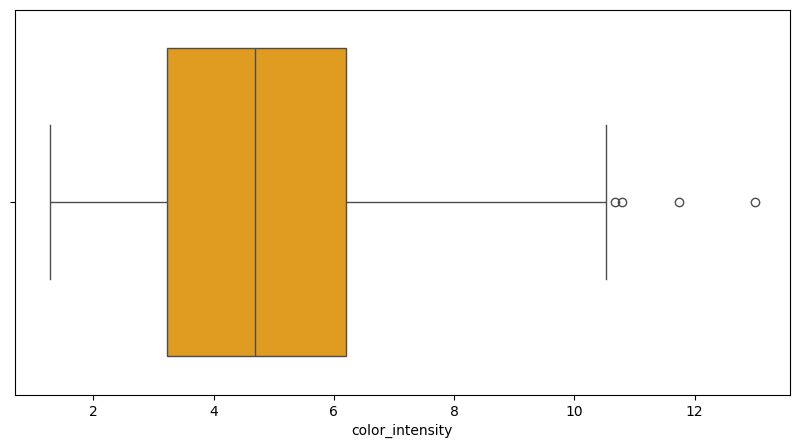

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = data['color_intensity'], color='orange', orient='h')

### 6.4 목표값에서 고유값 확인하기

In [ ]:
# 현재의 목표변수는 class이다.
print(data['class'].unique()) # class의 고윳값 확인
print(data['class'].nunique(), '\n') # class의 고윳값 개수 확인
print(data['class'].value_counts()) # class의 각 고유값의 개수 확인

[0 1 2]
3 

class
1    71
0    59
2    48
Name: count, dtype: int64


In [ ]:
data['class'].value_counts() # class의 각 고유값의 개수 확인

,count
class,
1,71
0,59
2,48


/tmp/ipython-input-2139269995.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data['class'].value_counts().index, y = data['class'].value_counts(), palette='colorblind')


<Axes: xlabel='class', ylabel='count'>

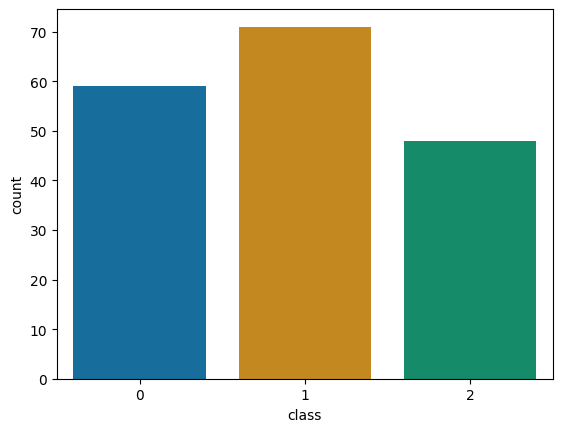

In [ ]:
sns.barplot(x = data['class'].value_counts().index, y = data['class'].value_counts(), palette='colorblind')

In [ ]:
data['class'].value_counts().index

Index([1, 0, 2], dtype='int64', name='class')

In [ ]:
ax = sns.countplot(x = 'day', data = tips,
                  order = tips['day'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(-5, 100)
plt.show()

/tmp/ipython-input-2968978120.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'class', data=data, palette='colorblind')


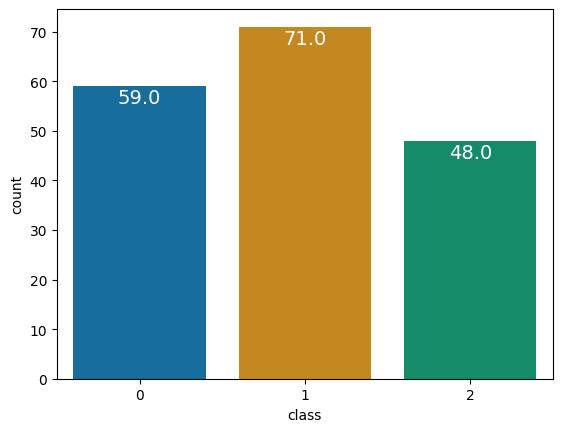

In [ ]:
ax = sns.countplot(x = 'class', data=data, palette='colorblind')

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2., height - 3.5, height, ha = 'center', size = 14, color = 'white')
plt.show()

### 6.5 전처리 : 결측치 처리하기

In [ ]:
# 결측치 확인하기
data.isna() # boolean으로 결측치 확인 (True이면 결측치가 존재)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()
# data.isnull().sum()

,0
alcohol,2
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,5
proanthocyanins,0
color_intensity,0


In [ ]:
data.isna().mean()

,0
alcohol,0.011236
malic_acid,0.000000
ash,0.000000
alcalinity_of_ash,0.000000
magnesium,0.000000
total_phenols,0.000000
flavanoids,0.000000
nonflavanoid_phenols,0.028090
proanthocyanins,0.000000
color_intensity,0.000000


- alcohol은 약 1.12%, nonflavanoid_phenols는 약 2.81%가 결측치이다.

In [ ]:
# 결측치 처리 : 행 제거하기
data.dropna()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [ ]:
data.dropna().isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [ ]:
print(' 기존 데이터 :', data.shape, '\n', '행 제거 후 데이터 :', data.dropna().shape)

 기존 데이터 : (178, 14) 
 행 제거 후 데이터 : (171, 14)


- 결측치가 존재하는 행을 제거하여 총 178개의 행이 171개로 7개 줄어들음.

In [ ]:
# data = data.dropna()
# data.dropna(inplace = True)

In [ ]:
# 지정된 변수의 결측치가 존재하는 행만 제거
data.dropna(subset = ['alcohol'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [ ]:
data.dropna(subset = ['alcohol']).isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,5
proanthocyanins,0
color_intensity,0


In [ ]:
# 결측치 처리 : 변수 제거
data.drop(['alcohol', 'nonflavanoid_phenols'], axis = 1)

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.71,2.43,15.6,127,2.80,3.06,2.29,5.64,1.04,3.92,1065,0
1,1.78,2.14,11.2,100,2.65,2.76,1.28,4.38,1.05,3.40,1050,0
2,2.36,2.67,18.6,101,2.80,3.24,2.81,5.68,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,2.18,7.80,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,1.06,7.70,0.64,1.74,740,2
174,3.91,2.48,23.0,102,1.80,0.75,1.41,7.30,0.70,1.56,750,2
175,4.28,2.26,20.0,120,1.59,0.69,1.35,10.20,0.59,1.56,835,2
176,2.59,2.37,20.0,120,1.65,0.68,1.46,9.30,0.60,1.62,840,2


In [ ]:
data.drop(['alcohol', 'nonflavanoid_phenols'], axis = 1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   malic_acid                    178 non-null    float64
 1   ash                           178 non-null    float64
 2   alcalinity_of_ash             178 non-null    float64
 3   magnesium                     178 non-null    int64  
 4   total_phenols                 178 non-null    float64
 5   flavanoids                    178 non-null    float64
 6   proanthocyanins               178 non-null    float64
 7   color_intensity               178 non-null    float64
 8   hue                           178 non-null    float64
 9   od280/od315_of_diluted_wines  178 non-null    float64
 10  proline                       178 non-null    int64  
 11  class                         178 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 16.8 KB


In [ ]:
# 결측치 채우기
data.fillna(-99).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,-99.00,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
data.fillna(-99).loc[(data.fillna(-99) == -99).any(axis=1)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
1,-99.00,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.050,3.40,1050,0
8,-99.00,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.080,2.85,1045,0
70,12.29,1.61,2.21,20.4,103,1.10,1.02,-99.00,1.46,3.05,0.906,1.82,870,1
95,12.47,1.52,2.20,19.0,162,2.50,2.27,-99.00,3.28,2.60,1.160,2.63,937,1
102,12.34,2.45,2.46,21.0,98,2.56,2.11,-99.00,1.31,2.80,0.800,3.38,438,1
103,11.82,1.72,1.88,19.5,86,2.50,1.64,-99.00,1.42,2.06,0.940,2.44,415,1
120,11.45,2.40,2.42,20.0,96,2.90,2.79,-99.00,1.83,3.25,0.800,3.39,625,1


In [ ]:
data.fillna(data.mean()) # 평균값으로 결측치 채우기

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.230000,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,12.989091,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.160000,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.370000,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.240000,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.400000,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.270000,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.170000,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [ ]:
data[['alcohol', 'nonflavanoid_phenols']].mean()

,0
alcohol,12.989091
nonflavanoid_phenols,0.362370


In [ ]:
data.fillna(data.mean()).iloc[[1,8,70,95,102,103,120]]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
1,12.989091,1.78,2.14,11.2,100,2.65,2.76,0.26000,1.28,4.38,1.050,3.40,1050,0
8,12.989091,1.64,2.17,14.0,97,2.80,2.98,0.29000,1.98,5.20,1.080,2.85,1045,0
70,12.290000,1.61,2.21,20.4,103,1.10,1.02,0.36237,1.46,3.05,0.906,1.82,870,1
95,12.470000,1.52,2.20,19.0,162,2.50,2.27,0.36237,3.28,2.60,1.160,2.63,937,1
102,12.340000,2.45,2.46,21.0,98,2.56,2.11,0.36237,1.31,2.80,0.800,3.38,438,1
103,11.820000,1.72,1.88,19.5,86,2.50,1.64,0.36237,1.42,2.06,0.940,2.44,415,1
120,11.450000,2.40,2.42,20.0,96,2.90,2.79,0.36237,1.83,3.25,0.800,3.39,625,1


- 결측치 처리 방식 : 행 제거 (dropna)
> - 일반적으로는 dropna를 사용하여 행을 제거하는 방식을 사용한다.
> - 평균 등을 이용하여 결측치를 채우더라도 실제값과 일치할 가능성이 매우 낮기에 오차의 원인이 될 수 밖에 없다.
> - 하지만 만약 결측치가 존재하는 행이 90%라면 90%이 데이터가 삭제될 수 있다.
> - dropna는 결측치 비중이 매우 낮고, 데이터가 커야한다.
- 결측치 처리 방식 : 변수 제거 (drop)
> - 변수 하나하나가 매우 중요한 머신러닝에서 변수 제거는 모델링에 도움이 되지 않는 경우가 많다.
> - 하지만 특정 변수의 99%가 결측치일 때는 합리적일 수 있다.
> - 따라서 통상적으로는 50% 이상이라면 고려할 만하고, 70 ~ 80% 이상이라면 가급적 사용하는게 좋다.
> - 하지만 경우에 따라서 90%가 결측치라고 해도 매우 중요한 변수라 예상된다면 어떻게든 활용 방법을 찾는 것이 좋다.
- 결측치 처리 방식 : 결측치 채우기 (fillna)
> - 평균값이나 중앙값 등으로 채우는 방식은 무난하다.
> - 하지만 결국 추정치이기에 노이즈를 피할 수는 없다.


In [ ]:
# 중앙값으로 결측치 채우기
data.fillna(data.median(), inplace = True)

In [ ]:
data.iloc[[1,8,70,95,102,103,120]]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
1,13.05,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.050,3.40,1050,0
8,13.05,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.080,2.85,1045,0
70,12.29,1.61,2.21,20.4,103,1.10,1.02,0.34,1.46,3.05,0.906,1.82,870,1
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.34,3.28,2.60,1.160,2.63,937,1
102,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.80,0.800,3.38,438,1
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.34,1.42,2.06,0.940,2.44,415,1
120,11.45,2.40,2.42,20.0,96,2.90,2.79,0.34,1.83,3.25,0.800,3.39,625,1


In [ ]:
data.isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


### 6.6 스케일링
- 데이터의 슼케일(scale)을 맞추는 작업.
- K-NN 알고리즘의 경우에는 거리 기반 알고리즘이기에 각 컬럼의 범위가 다르면 좋지 않은 결과가 나올 수 있다.

- 스케일링 종류
> - 표준화 스케일링 : 평균이 0, 표준편차가 1이 되도록 데이터를 고르게 분포시키는 데 사용
> - 로버스트 스케일링 : 데이터에 아웃라이어가 존재하고, 그 영향력을 그대로 유지하고 싶을 때 사용
> - 최소 - 최대 스케일링 : 데이터 분포의 특성을 최대한 그대로 유지하고 싶을 때 사용
> - 정규화 스케일링 ; 행 기준의 스케일링이 필요할 때 사용하나, 실제로 거의 사용하지 않음

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
# 표준화 스케일링
st_scaler = StandardScaler() # 스케일러 지정
st_scaler.fit(data) # 학습
st_scaler = st_scaler.transform(data) # 학습에서 얻은 정보 계산
st_scaler

array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [ ]:
pd.DataFrame(st_scaler)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [ ]:
st_scaler = pd.DataFrame(st_scaler, columns = data.columns)

In [ ]:
pd.DataFrame(st_scaler)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [ ]:
round(st_scaler.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


In [ ]:
# 로버스트 스케일링
rb_scaler = RobustScaler() # 스케일러 지정
rb_scaler = rb_scaler.fit_transform(data) # 학습
rb_scaler = pd.DataFrame(rb_scaler, columns = data.columns)
rb_scaler

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0.907692,-0.104730,0.201439,-0.906977,1.526316,0.420804,0.553892,-0.358209,1.050000,0.318792,0.222222,0.924949,0.808050,-0.5
1,0.000000,-0.057432,-0.633094,-1.930233,0.105263,0.278960,0.374251,-0.477612,-0.392857,-0.104027,0.251852,0.503043,0.777090,-0.5
2,0.084615,0.334459,0.892086,-0.209302,0.157895,0.420804,0.661677,-0.238806,1.792857,0.332215,0.192593,0.316430,1.055728,-0.5
3,1.015385,0.057432,0.402878,-0.627907,0.789474,1.413712,0.811377,-0.597015,0.892857,1.043624,-0.311111,0.543611,1.664603,-0.5
4,0.146154,0.489865,1.467626,0.348837,1.052632,0.420804,0.332335,0.298507,0.378571,-0.124161,0.222222,0.121704,0.126935,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.507692,2.557432,0.258993,0.232558,-0.157895,-0.638298,-0.913174,1.074627,-0.707143,1.010067,-0.962963,-0.843813,0.137255,0.5
174,0.269231,1.381757,0.345324,0.813953,0.210526,-0.524823,-0.829341,0.537313,-0.207143,0.875839,-0.785185,-0.989858,0.157895,0.5
175,0.169231,1.631757,-0.287770,0.116279,1.157895,-0.723404,-0.865269,0.537313,-0.292857,1.848993,-1.111111,-0.989858,0.333333,0.5
176,0.092308,0.489865,0.028777,0.116279,1.157895,-0.666667,-0.871257,1.134328,-0.135714,1.546980,-1.081481,-0.941176,0.343653,0.5


In [ ]:
round(rb_scaler.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


- 표준화 스케일링과 달리 평균, 표준편차 대신 각 컬럼의 사분위값을 사용한다

In [ ]:
# 최소-최대 스케일링
mm_scaler = MinMaxScaler() # 스케일러 지정
mm_scaler = mm_scaler.fit_transform(data) # 학습
mm_scaler = pd.DataFrame(mm_scaler, columns = data.columns)
mm_scaler

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0.860215,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.543011,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.572581,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.897849,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.594086,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.720430,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,1.0
174,0.637097,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1.0
175,0.602151,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1.0
176,0.575269,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1.0


In [ ]:
round(mm_scaler.describe(), 2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


- 모든 컬럼에서 최대값이 1, 최소값이 0인 행태로 변환한다.

- 6.6.4 스케일링 방식 선택하기
> - 표준화 스케일링 : 아웃라이어의 영향을 받음. 평균 0, 표준편차 1이 되게끔 분포시키기에, 데이터의 기존 분포 형태가 사라지고 정규분포를 따르는 결과물을 가짐.
> - 로버스트 스케일링 : 사분위값을 사용하기에 아웃라이어의 영향을 받지 않음. 변환된 데이터의 범위는 표준화 스케일링이나 최소-최대 스케일링보다 넓게 나타남.
> - 최소 - 최대 스케일링 : 아웃라이어의 영향을 받음. 데이터의 기존 분포를 가장 있는 그대로 담아내며 스케일만 변화시킴. 데이터의 범위는 0 ~ 1로 나타남.

- 스케일리을 할 때 주의할 점
> - 스케일링 대상에서 종속변수를 제외해야 함 : 종속변수를 예측해야할기에 이 변수는 그대로 남겨야함.
> - 스케일링 전 훈련셋과 시험셋을 나누어야 함 : 훈련셋에서 fit()으로 스케일링을 위한 값을 학습시키고, 이 값을 활용하여 훈련셋과 시험셋을 변환해야함.
> > - 즉, 스케일러에서 fit에 의한 학습은 훈련셋에서만 진행하고, transform을 통해 시험셋에 적용한다.
> > - 만약 나누기 전에 스케일링을 한다면 새 데이터가 올 때마다 합쳐서 다시 학습을 진행해야한다.(비용과 시간이 많이 들고, 불편함)


In [ ]:
# 스케일링 적용하기
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis = 1), data['class'], test_size = 0.2, random_state=100)
X = data.drop('class', axis = 1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [ ]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [ ]:
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [ ]:
X_train_scaled, X_test_scaled

(array([[0.40053763, 0.33399209, 0.43315508, ..., 0.30172414, 0.55311355,
         0.03352354],
        [0.26075269, 0.53162055, 0.34224599, ..., 0.32758621, 0.65201465,
         0.20399429],
        [0.31451613, 0.45256917, 0.51336898, ..., 0.09482759, 0.20512821,
         0.16547789],
        ...,
        [0.36021505, 0.08498024, 0.29946524, ..., 0.49137931, 0.80952381,
         0.16547789],
        [0.66397849, 0.21146245, 0.6684492 , ..., 0.49137931, 0.93406593,
         0.40442225],
        [0.54301075, 0.17786561, 0.43315508, ..., 0.45689655, 0.57875458,
         0.54707561]]),
 array([[ 0.16397849,  0.26086957,  0.58823529,  0.56701031,  0.20289855,
          0.3057554 ,  0.26464208,  0.63265306,  0.29652997,  0.16170213,
          0.38793103,  0.54212454,  0.28673324],
        [ 0.65860215,  0.18379447,  0.68449198,  0.61340206,  0.27536232,
          0.53956835,  0.13665944,  0.71428571,  0.59305994,  1.11382979,
          0.01724138,  0.18681319,  0.24393723],
        [ 0.830

### 6.7 모델링 및 예측/평가하기

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
pred

array([1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score
print('K-NN 모델 정확도 :', accuracy_score(y_test, pred))

K-NN 모델 정확도 : 0.8888888888888888


### 6.8 하이퍼파라미터 튜닝하기
- K-NN기법에서 하이퍼파라미터인 K값을 지정해야한다. 위의 코드처럼 따로 지정을 안하면 기본값인 5로 적용이 된다.

- KNeighborsClassifier()의 주요 파라미터
> - n_neighbors : 이웃 수 (default : 5)
> - weights : 예측에 사용되는 가중치 함수 (default : uniform(모든 포인트에 동일한 가중치 부여))
> - metric : 거리측정 기준 (default : minkowski)
> - n_jobs : 실행할 병렬 작업 수 (default : None)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9166666666666666

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.8888888888888888

- 이처럼 K값을 따로 확인하기에는 너무 번거롭다. 반복문을 이용하여 가장 정확도가 좋은 K값을 찾자.

In [ ]:
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  pred = knn.predict(X_test_scaled)
  print(f'K : {i}, 정확도 : {accuracy_score(y_test, pred)}')

K : 1, 정확도 : 0.9166666666666666
K : 2, 정확도 : 0.8888888888888888
K : 3, 정확도 : 0.8888888888888888
K : 4, 정확도 : 0.9166666666666666
K : 5, 정확도 : 0.8888888888888888
K : 6, 정확도 : 0.9166666666666666
K : 7, 정확도 : 0.9166666666666666
K : 8, 정확도 : 0.8888888888888888
K : 9, 정확도 : 0.8888888888888888
K : 10, 정확도 : 0.8888888888888888
K : 11, 정확도 : 0.9166666666666666
K : 12, 정확도 : 0.9166666666666666
K : 13, 정확도 : 0.9722222222222222
K : 14, 정확도 : 0.9444444444444444
K : 15, 정확도 : 0.9444444444444444
K : 16, 정확도 : 0.9444444444444444
K : 17, 정확도 : 0.9166666666666666
K : 18, 정확도 : 0.9722222222222222
K : 19, 정확도 : 0.9444444444444444
K : 20, 정확도 : 0.9722222222222222


In [ ]:
scores = []
for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  pred = knn.predict(X_test_scaled)
  acc = accuracy_score(y_test, pred)
  scores.append(acc)

In [ ]:
scores

[0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222]

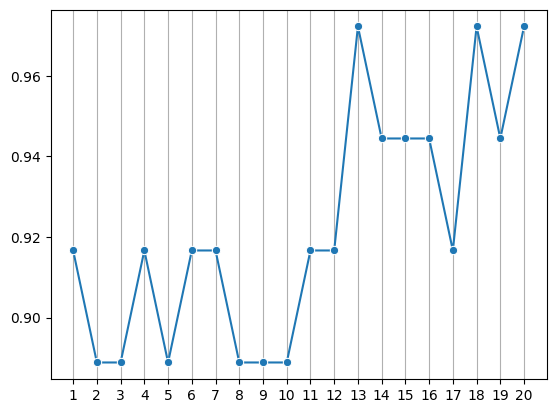

In [ ]:
sns.lineplot(x = range(1,21), y = scores, marker = 'o')
plt.xticks(range(1,21))
plt.grid(axis = 'x');

In [ ]:
# lineplot에서 가장 좋은 accuracy를 가지며, K값이 작은 값은 13이다.
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
print('K=13인 K-NN의 정확도 : ', accuracy_score(y_test, pred))

K=13인 K-NN의 정확도 :  0.9722222222222222


### 6.9 이해하기 : K-최근접 이웃


- 6.9.1 거리 기반의 의미 파악하기
> - 현재의 데이터를 기반으로 새로운 데이터가 주어질 때 이 데이터가 어떠한 값을 가질지를 예측(분류)하는 방법이다.
> - 새로운 데이터가 주어졌을 때 그 데이터와 가장 가까운 거리를 가진 기존의 데이터 K개를 확인하여 종속변수의 값이 무엇인지 확인하여 다수결에 의해 예측한다.

- 6.9.2 스케일링
> - 거리를 기반으로 하는 K-최근접 이웃 알고리즘은 각 컬럼에 대한 스케일이 늘어날수록 예측하는데에 문제가 발생할 수 있으므로 각 변수의 스케일을 통일하는 스케일링을 사용한다.

- 6.9.3 동점일 때 처리
> - 만약 K를 2로 지정하여 하나는 원, 나머지 하나는 네모로 동점이라면 최종 예측값은 랜덤으로 결정된다.
> - 해결방법 1 : K를 항상 홀수로 지정한다.
> - 해결방법 2 : weight 파라미터를 지정하여 더욱 가까운 쪽에 가중치를 준다.

- 6.9.4 K-최근접 이웃 알고리즘의 계산 특징
> - 예측할 데이터와 기존 데이터의 거리만 계산하면 되기에 모델링에서 fit() 과정은 기존의 데이터 위치를 스크린샷하는 정도일 뿐, 별다른 학습을 하지않는다.
> - K-NN은 새로운 데이터가 주어지기 전까지 굳이 거리를 계산할 일이 없기에 fit()함수는 단지 학습데이터의 위치를 스크린샷하는 정도이다.
> - predict() 함수를 사용하여 예측을 하면, 새로운 데이터와 학습 데이터 사이의 거리들을 계산하고 이를 기반으로 예측한다.
> - 그래서 fit() 과정은 빠르게 끝나지만, predict()에서 상당한 시간이 걸리 수 있다.